In [1]:
print('ready')

ready


# Question #1

1. Produce a table ranked by the most frequently observed gene in the highest number of patient samples.


In [18]:
import pandas as pd

df = pd.read_csv('C:/Users/bciez/Documents/Basilio/UCSF/a1_table_ranked_by_most_freq',sep=' ')
df.head()

,num,gene_name
0,20,PGK1
1,8,PWWP3A
2,6,MIR4479
3,5,CYTH1
4,4,GAK


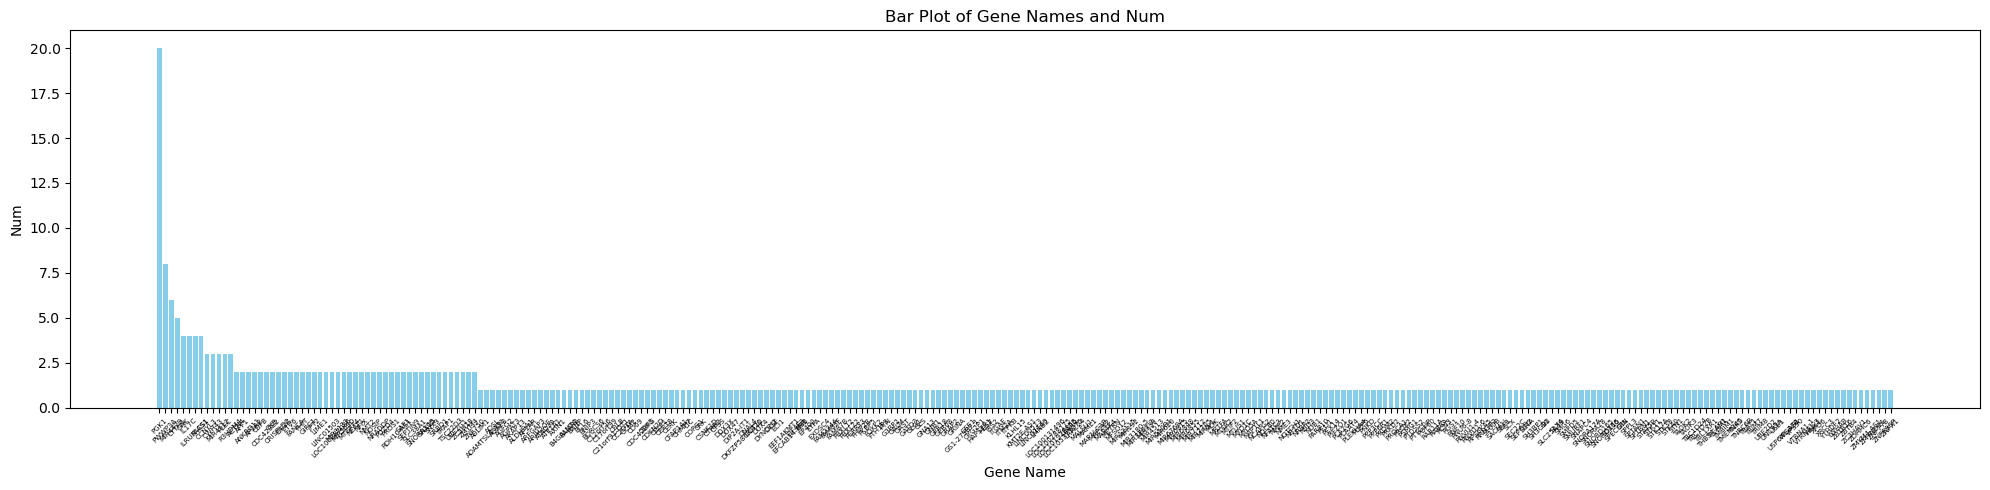

In [22]:
import matplotlib.pyplot as plt

# Data
gene_names = df['gene_name'].tolist()
num = df['num'].tolist()

# Create bar plot
plt.figure(figsize=(20, 5))
plt.bar(gene_names, num, color='skyblue')
plt.xlabel('Gene Name')
plt.ylabel('Num')
plt.title('Bar Plot of Gene Names and Num')
plt.xticks(rotation=45,fontsize=5)
plt.tight_layout()

# Show plot
plt.show()


In [23]:
# including span count

In [90]:
import pandas as pd

df = pd.read_csv('./data/overlap_clinical_and_open_chromatin.bed',sep='\t')
df.head()

,chr,start,end,strand,hit_count,span_count,gene_name1,gene_name2
0,chrX,155036210,155036211,+,13,1,FUNDC2,FUNDC2
1,chrX,155036210,155036211,+,13,1,FUNDC2,FUNDC2
2,chrX,155036210,155036211,+,13,1,FUNDC2,FUNDC2
3,chrX,155036210,155036211,+,13,1,FUNDC2,FUNDC2
4,chrX,139752397,139752398,+,9,1,MCF2,ATP11C


In [91]:
list_of_uniq_genes = list(set(df['gene_name1'].tolist()))

In [92]:
len(list_of_uniq_genes)

6309

In [93]:
df_filt = df[df['gene_name1'] == 'PGK1']
num_span = df_filt['span_count'].sum()
print(num_span)

1664


In [95]:
list_num_span = []
list_num_hit = []
for gene in list_of_uniq_genes:
    df_filt = df[df['gene_name1'] == gene]
    num_span = df_filt['span_count'].sum()
    num_hit = df_filt['hit_count'].sum()
    list_num_span.append(num_span)
    list_num_hit.append(num_hit)
print('Finished Calculating hit and span per gene')


Finished Calculating hit and span per gene


In [72]:
#list_num_hit.sort(reverse=True)

In [96]:
df_list_genes_counts = pd.DataFrame([list_of_uniq_genes,list_num_span,list_num_hit])
df_list_genes_counts_t = df_list_genes_counts.transpose()
df_list_genes_counts_t = df_list_genes_counts_t.rename(columns={0: 'gene',1:'span_count',2:'hit_count'})
df_list_genes_counts_t_sorted = df_list_genes_counts_t.sort_values(by='span_count',ascending=False)
df_list_genes_counts_t_sorted.head(10)

,gene,span_count,hit_count
4372,PGK1,1664,4894
526,PLEC,467,1760
6083,NPLOC4,457,1577
6288,PACS1,419,1087
132,MIR4479,391,860
4221,NPRL3,376,634
5415,NEAT1,376,858
2733,SNAPC4,316,372
6201,SPTAN1,285,880
3135,MUM1,283,1158


In [97]:
df_list_genes_counts_t_sorted.to_csv('./data/a1_table_ranked_by_most_freq_using60ENCONDES.csv',sep='\t',index=None)
print('ready saving data')

ready saving data
